# DH 140 Final Project

## Project Introduction

### Research Question and Importance

#### For my final project, I want to explore the music industry and how it has changed over the years. More specifically, I want to look at how music industry sales have changed in the past 40 years, both in terms of quantity and type of sales (CDs, paid subscription, etc). This topic is important in order to understand how the music industry sales have shifted and how customer preferences have changed. This topic is of interest to me as I'm extremely interested in the music industry and potentially working on the business side of the music industry after graduation. This topic is important to artists and companies within the industry as they must understand the current landscape and how to maximize sales and cater to customer's preferences. 

### Data Source

#### The data source I will use to explore this question is a dataset on music industry sales over the past 40 years created by the Recording Industry Association of America (RIAA). According to RIAA, this is the most comprehensive data on U.S. recorded music revenues. This dataset goes all the way back to 1973 and lists format of sale, year of sale, and quantity of sale. A link to the dataset can be found here: https://data.world/makeovermonday/2020w21-visualizing-40-years-of-music-industry-sales

### Analysis and Visualizations

#### I chose this dataset as I intend to analyze how music industry sales have changed since 1973. I intend to analyze whether sales in general have increased or decreased as well as how the format of sales have changed between 1973 and now. For visualizations, I plan to use pie charts to show the breakdown of format of sales for each year. I also plan to create bar charts to show the number of sales each year from 1973 to now. 

## The Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MusicData2.csv')

In [3]:
df.shape

(3008, 5)

In [4]:
# the dataset has 5 columns and 3008 rows of data 

In [5]:
df.columns

Index(['﻿Format', 'Metric', 'Year', 'Number of Records', 'Value (Actual)'], dtype='object')

In [6]:
# looking at the first 5 entries

In [7]:
df.dtypes

﻿Format               object
Metric                object
Year                   int64
Number of Records      int64
Value (Actual)       float64
dtype: object

In [8]:
df.head()

,﻿Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN


In [9]:
# looking at the last 5 entries

In [10]:
df.tail()

,﻿Format,Metric,Year,Number of Records,Value (Actual)
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197
3007,Vinyl Single,Value (Adjusted),2019,1,6.795946


In [11]:
# finding summary statistics

In [12]:
df.describe()

,Year,Number of Records,Value (Actual)
count,3008.000000,3008.0,1351.000000
mean,1996.000000,1.0,781.291237
std,13.566915,0.0,2246.837672
min,1973.000000,1.0,-7.650944
25%,1984.000000,1.0,3.700228
50%,1996.000000,1.0,63.900000
75%,2008.000000,1.0,448.900000
max,2019.000000,1.0,19667.327790


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ﻿Format            3008 non-null   object 
 1   Metric             3008 non-null   object 
 2   Year               3008 non-null   int64  
 3   Number of Records  3008 non-null   int64  
 4   Value (Actual)     1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [14]:
print(df)

           ﻿Format            Metric  Year  Number of Records  Value (Actual)
0               CD             Units  1973                  1             NaN
1               CD             Units  1974                  1             NaN
2               CD             Units  1975                  1             NaN
3               CD             Units  1976                  1             NaN
4               CD             Units  1977                  1             NaN
...            ...               ...   ...                ...             ...
3003  Vinyl Single  Value (Adjusted)  2015                  1        6.205390
3004  Vinyl Single  Value (Adjusted)  2016                  1        5.198931
3005  Vinyl Single  Value (Adjusted)  2017                  1        6.339678
3006  Vinyl Single  Value (Adjusted)  2018                  1        5.386197
3007  Vinyl Single  Value (Adjusted)  2019                  1        6.795946

[3008 rows x 5 columns]


In [15]:
# Looking at the data, the column "Value (Actual)" has missing information for many of the data entires. 
# Additionally, it is unclear what this value is actually measuring, therefore making it hard to interpret this data.

In [16]:
# replacing all Nan values with a zero 

In [47]:
new_df = df.fillna(0)
new_df

,﻿Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


### Exploratory Data Visualizations

In [18]:
# creating a new dataframe with all the sales from 1973

In [19]:
df_1973 = new_df[new_df['Year'] == 1973]
df_1973

,﻿Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,0.000000
47,CD Single,Units,1973,1,0.000000
94,Cassette,Units,1973,1,15.000000
141,Cassette Single,Units,1973,1,0.000000
188,LP/EP,Units,1973,1,280.000000
...,...,...,...,...,...
2773,Ringtones & Ringbacks,Value (Adjusted),1973,1,0.000000
2820,SACD,Value (Adjusted),1973,1,0.000000
2867,SoundExchange Distributions,Value (Adjusted),1973,1,0.000000
2914,Synchronization,Value (Adjusted),1973,1,0.000000


<AxesSubplot:>

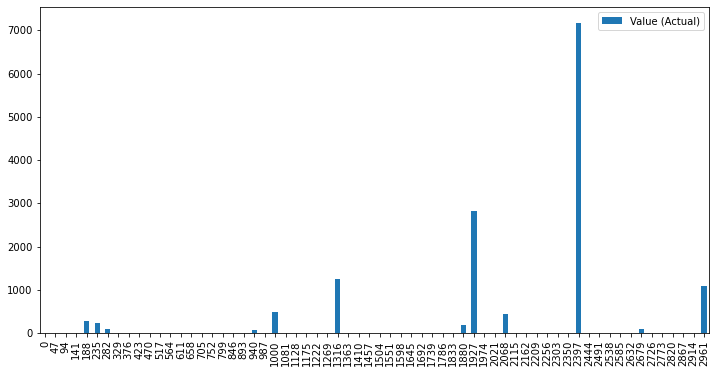

In [20]:
df_1973.plot(kind='bar', y='Value (Actual)', figsize=(12,6))

In [21]:
# there is a lot of missing data for 1973, but that's because many of the format's such as downloading weren't available yet

In [22]:
# creating a df with all the CD sales from 1973-2019

In [23]:
cd_entries = new_df.loc[0:46]
cd_entries

,﻿Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,0.000000
1,CD,Units,1974,1,0.000000
2,CD,Units,1975,1,0.000000
3,CD,Units,1976,1,0.000000
4,CD,Units,1977,1,0.000000
5,CD,Units,1978,1,0.000000
6,CD,Units,1979,1,0.000000
7,CD,Units,1980,1,0.000000
8,CD,Units,1981,1,0.000000
9,CD,Units,1982,1,0.000000


In [24]:
cd_values = new_df.loc[0:46, ['Year', 'Value (Actual)']]
cd_values

,Year,Value (Actual)
0,1973,0.000000
1,1974,0.000000
2,1975,0.000000
3,1976,0.000000
4,1977,0.000000
5,1978,0.000000
6,1979,0.000000
7,1980,0.000000
8,1981,0.000000
9,1982,0.000000


In [25]:
# removing any commas

In [26]:
new_df = new_df.replace(',','', regex=True)

In [27]:
# changing the Value (Actual) column from an object to numeric values

In [28]:
new_df['Value (Actual)'] = pd.to_numeric(df['Value (Actual)'])

In [29]:
# plotting CD sales from 1973 to 2019

<AxesSubplot:xlabel='Year'>

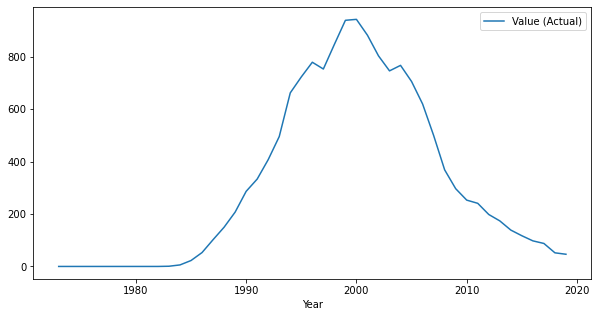

In [30]:
cd_values.plot(kind='line', x='Year', y='Value (Actual)', figsize=(10,5))

In [31]:
# creating a dataframe of CD single sales

In [48]:
cd_single = new_df.loc[47:93, ['Year', 'Value (Actual)']]
cd_single

,Year,Value (Actual)
47,1973,0.000000
48,1974,0.000000
49,1975,0.000000
50,1976,0.000000
51,1977,0.000000
52,1978,0.000000
53,1979,0.000000
54,1980,0.000000
55,1981,0.000000
56,1982,0.000000


In [33]:
# plotting CD single sales from 1973 to 2019

<AxesSubplot:xlabel='Year'>

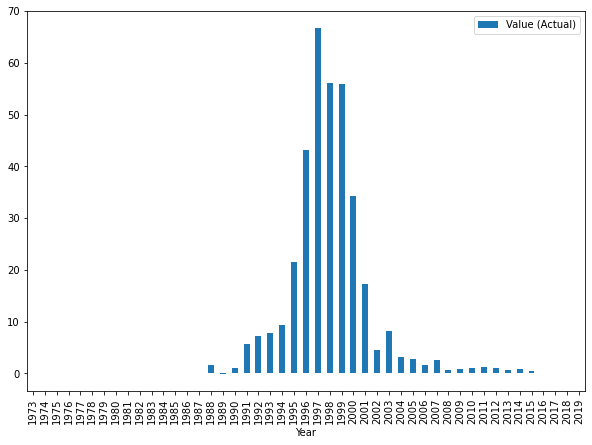

In [34]:
cd_single.plot(kind='bar', x='Year', y='Value (Actual)', figsize=(10,7))

In [35]:
# creating a new dataframe that has all of the sales adjusted to present value

In [36]:
adjusted = new_df[new_df['Metric'] == 'Value (Adjusted)']
adjusted

,﻿Format,Metric,Year,Number of Records,Value (Actual)
1927,8 - Track,Value (Adjusted),1973,1,2815.681824
1928,8 - Track,Value (Adjusted),1974,1,2848.008609
1929,8 - Track,Value (Adjusted),1975,1,2770.409498
1930,8 - Track,Value (Adjusted),1976,1,3047.215772
1931,8 - Track,Value (Adjusted),1977,1,3421.416287
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


In [37]:
# finding the adjusted values of CD sales to compare it to the unadjusted values I plotted above

In [50]:
cd_adjusted = adjusted[47:94]
cd_adjusted

,﻿Format,Metric,Year,Number of Records,Value (Actual)
1974,CD,Value (Adjusted),1973,1,NaN
1975,CD,Value (Adjusted),1974,1,NaN
1976,CD,Value (Adjusted),1975,1,NaN
1977,CD,Value (Adjusted),1976,1,NaN
1978,CD,Value (Adjusted),1977,1,NaN
1979,CD,Value (Adjusted),1978,1,NaN
1980,CD,Value (Adjusted),1979,1,NaN
1981,CD,Value (Adjusted),1980,1,NaN
1982,CD,Value (Adjusted),1981,1,NaN
1983,CD,Value (Adjusted),1982,1,NaN


<AxesSubplot:xlabel='Year'>

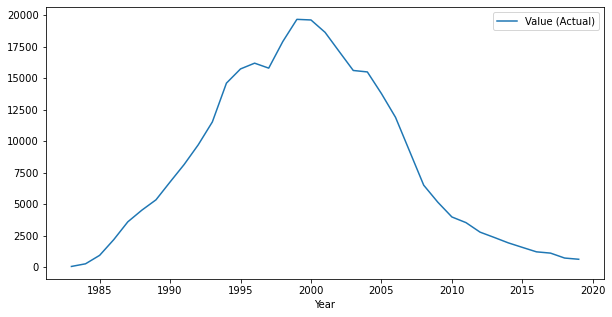

In [39]:
cd_adjusted.plot(kind='line', x='Year', y='Value (Actual)', figsize=(10,5))

In [40]:
# the shape looks the same as the previous CD plot, but the values on the y-axis are much larger

## Analysis

In [41]:
df_1973.plot(kind='bar', x='Format', y='Value (Actual)')

KeyError: 'Format'

In [42]:
cd_entries['Format']

KeyError: 'Format'

#### For my visualizations, I want to create pie charts or bar charts for each year that show the amount of sales in the different formats, however Python returns the error 'Format' whenever I try to use it. I have scheduled on OH for Friday to go over this issue with you.

<AxesSubplot:xlabel='Year'>

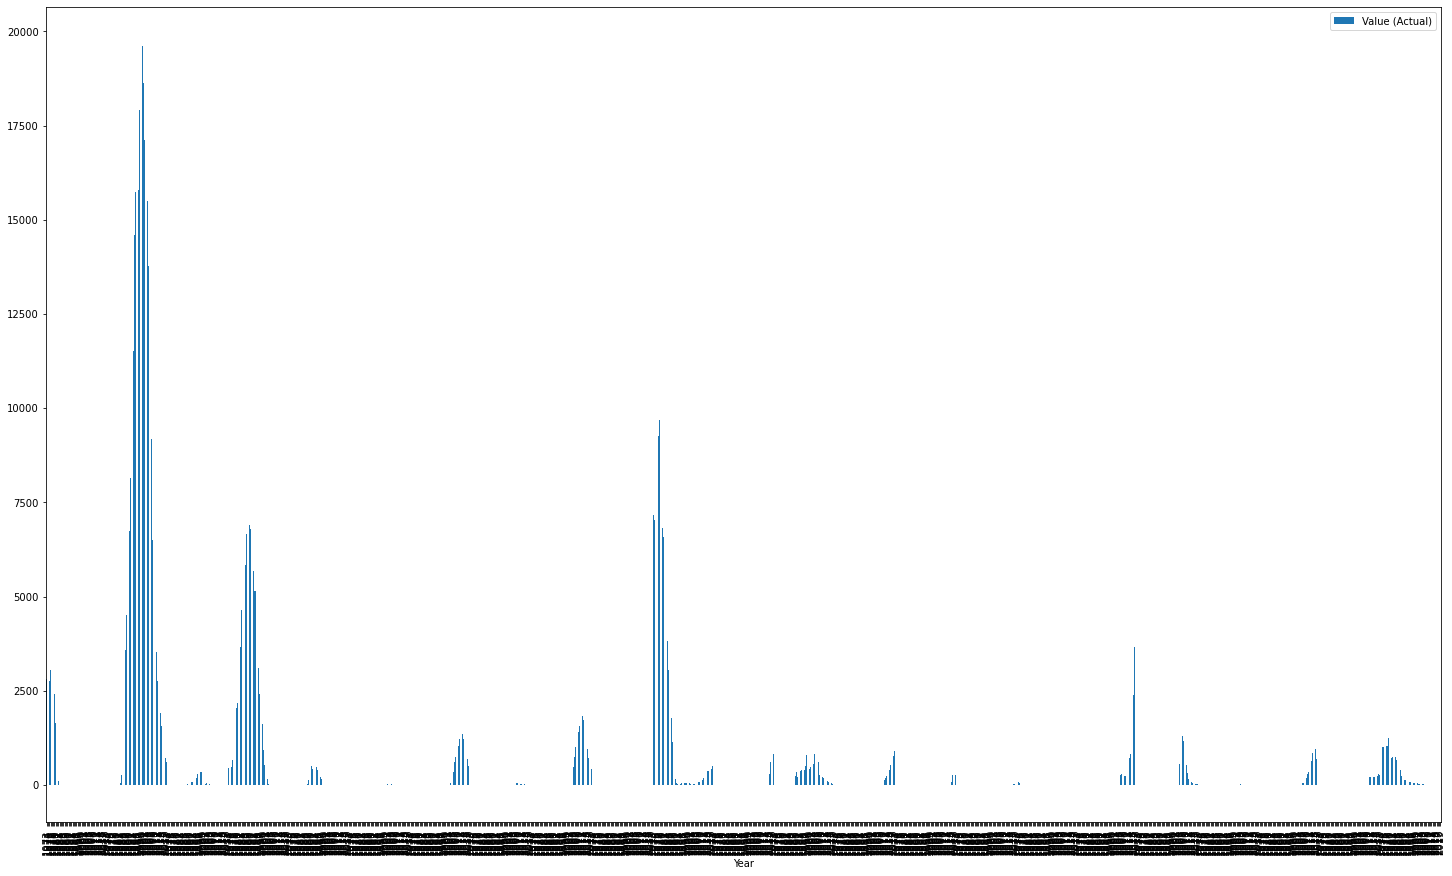

In [45]:
adjusted.plot(kind='bar', x='Year', y='Value (Actual)', figsize=(25,15))

#### As you can see, this didn't turn out well but I want to create a bar chart that has the number of sales adjusted for each year from 1973 to 2020. I'm not sure why this didn't work but will also bring it up in office hours. 

#### I also intend to make a stacked bar chart that has the number of sales each year from 1973 to 2020 that has the sales broken down by format as well. I can't do that until I figure out why Python won't let me plot using the column 'Format'. 